# Evaluation of the GPT-4 model.

To gain acces to the gpt-4 api you need to make a request to OpenAI. This can take a long time, therefore the dataset based on the gpt-4 responses have been done manually trough the ChatGPT interface and noting the answers in an Excel sheet.

In [1]:
import pandas as pd

def read_csv_file(filename):
    df = pd.read_csv(filename)
    return df

# Provide the filename of the CSV file you want to read
filename = 'GPT-4-Dataset.csv'

# Call the function to read the CSV file
dataframe = read_csv_file(filename)

dataframe = dataframe.rename(columns={'Unnamed: 20': 'Decision_Predicted', 'Unnamed: 18': 'Decision'})
dataframe = dataframe.drop(dataframe.index[0])
# Print the NumPy DataFrame
dataframe

,Paper Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Screening Results,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Decision,Unnamed: 19,Decision_Predicted
1,s_1489,ARTICLE,2018,ZHANG JS;TAN C;LV Q,“THIS IS WHY WE PLAY”: CHARACTERIZING ONLINE F...,PROFESSIONAL SPORTS CONSTITUTE AN IMPORTANT PA...,NBA;ONLINE FAN COMMUNITIES;PROFESSIONAL SPORTS...,PROFESSIONAL ASPECTS;SPORTS;OFF-LINE CONTEXT;P...,PROCEEDINGS OF THE ACM ON HUMAN-COMPUTER INTER...,5,...,NaN,NaN,Yes,Not sure,Yes,Yes,Yes,Included,Included,Rejected
2,s_1777,CONFERENCE PAPER,2017,SARIGIANNI C;WAIZENEGGER L;GEIGER M;REMUS U,“WE NEED TO TALK!” - PROJECT TEAMS DEALING WIT...,THE CONTINUOUS TECHNOLOGICAL DEVELOPMENT AND T...,COMMUNICATION;CONNECTIVITY;CONSULTANCY;HYPO-CO...,COMMUNICATION;INFORMATION SYSTEMS;INFORMATION ...,PROCEEDINGS OF THE 25TH EUROPEAN CONFERENCE ON...,1,...,NaN,NaN,Yes,Not sure,Yes,Yes,Yes,Included,Included,Included
3,w_0669,ARTICLE,2020,BARNSCHEN S;WALTER G;MERKWITZ R,``BEYOND SIMPLE EXPLANATIONS'' THE IMPACT OF D...,THIS STUDY ANALYZED THE IMPACT OF DEMOGRAPHIC ...,DIVERSITY;TEAM PERFORMANCE;LEADERSHIP,SEX-ROLE STEREOTYPES;WORK GROUP DIVERSITY;TOP ...,ZEITSCHRIFT FUR ARBEITS-UND ORGANISATIONSPSYCH...,0,...,PSYCHOLOGY,"PSYCHOLOGY, APPLIED",Yes,Yes,Yes,Yes,Yes,Included,Included,Included
4,w_2763,ARTICLE,2012,FRANSEN K;VANBESELAERE N;EXADAKTYLOS V;VANDE B...,"``YES, WE CAN!'': PERCEPTIONS OF COLLECTIVE EF...",COLLECTIVE EFFICACY CAN BE DEFINED AS A GROUP'...,TEAM CONFIDENCE;GROUP PERFORMANCE;INSTRUMENT D...,TEAM PERFORMANCE;SELF-EFFICACY;ELITE;BELIEFS;I...,JOURNAL OF SPORTS SCIENCES,39,...,SPORT SCIENCES,SPORT SCIENCES,Yes,Not sure,Yes,Yes,Yes,Included,Included,Included
5,s_5289,CONFERENCE PAPER,1992,KIRK SJ,`VENTURE': A GAMING/SIMULATION TO IMPROVE GROU...,"THIS PAPER ADDRESSES HOW GROUP DYNAMICS, GROUP...",NaN,COST ACCOUNTING;GAME THEORY;JOB SATISFACTION;M...,SAVE PROCEEDINGS (SOCIETY OF AMERICAN VALUE EN...,0,...,NaN,NaN,Yes,Not sure,Yes,Yes,Yes,Included,Included,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,w_2117,ARTICLE,2016,AYOKO OB,WORKPLACE CONFLICT AND WILLINGNESS TO COOPERAT...,PURPOSE - THIS PAPER AIMS TO CLARIFY THE RELAT...,CONFLICT;APOLOGY;FORGIVENESS;WILLINGNESS TO CO...,INTERPERSONAL FORGIVENESS;INDIVIDUAL-DIFFERENC...,INTERNATIONAL JOURNAL OF CONFLICT MANAGEMENT,25,...,COMMUNICATION; BUSINESS \& ECONOMICS; GOVERNME...,COMMUNICATION; MANAGEMENT; POLITICAL SCIENCE,Yes,Not sure,Yes,Yes,Yes,Included,Included,NaN
6860,w_1610,ARTICLE,2018,NAYAK T;SAHOO CK;MOHANTY PK,"WORKPLACE EMPOWERMENT, QUALITY OF WORK LIFE AN...",PURPOSE THE PURPOSE OF THE PAPER IS TO EXPLORE...,QUALITY OF WORK LIFE;EMPLOYEE COMMITMENT;HEALT...,ORGANIZATIONAL COMMITMENT;PSYCHOLOGICAL EMPOWE...,JOURNAL OF ASIA BUSINESS STUDIES,24,...,BUSINESS \& ECONOMICS,BUSINESS,Yes,Not sure,Yes,Yes,Yes,Included,Included,NaN
6861,w_1855,ARTICLE,2017,JERNG JS;HUANG SF;LIANG HW;CHEN LC;LIN CK;HUAN...,WORKPLACE INTERPERSONAL CONFLICTS AMONG THE HE...,OBJECTIVE THERE HAVE BEEN CONCERNS ABOUT THE W...,NaN,TEAM PERFORMANCE;ADVERSE EVENTS;SATISFACTION;M...,PLOS ONE,15,...,SCIENCE \& TECHNOLOGY - OTHER TOPICS,MULTIDISCIPLINARY SCIENCES,Yes,Not sure,Yes,Yes,Yes,Included,Included,NaN
6862,s_0781,CONFERENCE PAPER,2021,GIANNAKAS F;TROUSSAS C;KROUSKA A;SGOUROPOULOU ...,XGBOOST AND DEEP NEURAL NETWORK COMPARISON: TH...,"IN THE EDUCATIONAL SETTING, WORKING IN TEAMS I...",ADAMAX;COMPARISON;DEEP NEURAL NETWORK;MACHINE ...,COMPUTER AIDED INSTRUCTION;DEEP LEARNING;DEEP ...,LECTURE NOTES IN COMPUTER SCIENCE (INCLUDING S...,7,...,NaN,NaN,Yes,Not sure,Yes,Yes,Yes,Included,Included,NaN


Accuracy: 0.6077898550724637
F1 Score: 0.6168411363601202
Total entries after removing NA values and filtering: 1104


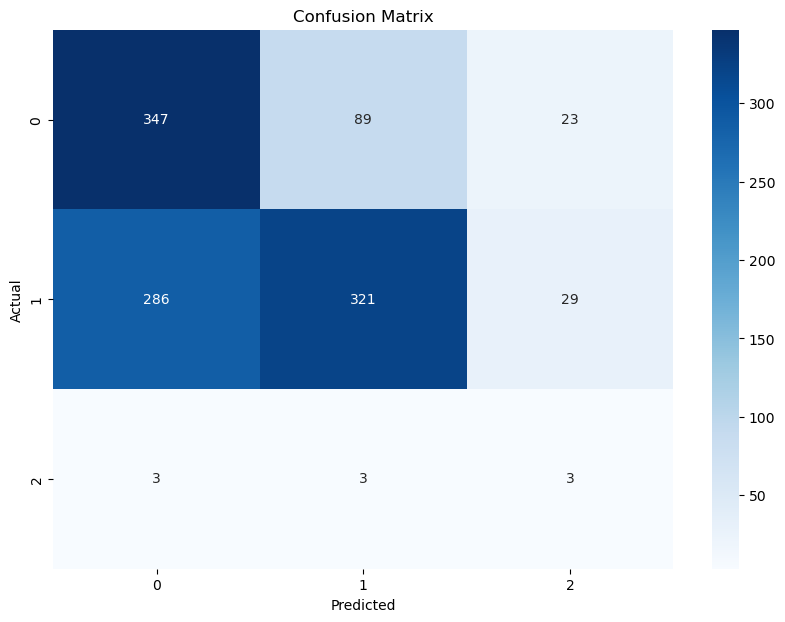

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
import numpy as np
import re

# Copy the big_frame DataFrame
df = dataframe.copy()

decision_mapping = {
    'Included': 0,
    'Rejected': 1,
    'Not Sure': 2,
    'NotSure': 2
}

# Remove rows with NA values
df = df.dropna(subset=['Decision', 'Decision_Predicted'])
df['Decision'] = df['Decision'].replace(decision_mapping)
df['Decision_Predicted'] = df['Decision_Predicted'].replace(decision_mapping)

df['Decision'] = df['Decision'].astype(int)

# Convert 'Decision_Predicted' column to strings
df['Decision_Predicted'] = df['Decision_Predicted'].astype(str)

# Extract numeric part from 'Decision_Predicted' column
df['Decision_Predicted'] = df['Decision_Predicted'].apply(lambda x: re.findall('\d+', x)[0] if re.findall('\d+', x) else '-1')
df['Decision_Predicted'] = df['Decision_Predicted'].astype(int)

# Filter out entries where Decision_Predicted is not in [0, 1, 2]
df = df[df['Decision_Predicted'].isin([0, 1, 2])]

# Get unique classes in the 'Decision' column
labels = np.unique(df[['Decision', 'Decision_Predicted']])

# Generate the confusion matrix
cm = confusion_matrix(df['Decision'], df['Decision_Predicted'], labels=labels)

accuracy = accuracy_score(df['Decision'], df['Decision_Predicted'])
f1 = f1_score(df['Decision'], df['Decision_Predicted'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Total entries after removing NA values and filtering: {len(df)}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()